# Titanic Fare Prediction using Regression

**Author:** Brett Vrtachnik  
**Date:** April 4, 2025  
**Objective:** Explore which passenger features best predict fare amounts on the Titanic using linear and polynomial regression models.


## Section 1: Import and Inspect the Data

### Import Dependencies

In [28]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Load the Titanic Dataset

In [29]:
# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2: Data Exploration and Preparation

### Prepare the Titanic data for regression modeling

In [30]:
# Impute missing values for age using **median**
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

# Drop rows with missing fare
titanic = titanic.dropna(subset=['fare'])

# Create numeric variables for categorical variables 
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

## Section 3: Feature Selection and Justification

### Define multiple combinations of features to use as inputs to predict fare

#### Case 1. age only

In [31]:
# Case 1. age
X1 = titanic[['age']]
y1 = titanic['fare']

#### Case 2. family_size only

In [32]:
# Case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']

#### Case 3. age and family size

In [33]:
# Case 3. age, family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

#### Case 4. pclass

In [34]:
# Case 4. pclass
X4 = titanic[['pclass']]
y4 = titanic['fare']

#### Reflection Questions

1. Why might these features affect a passenger’s fare:  
- **Age alone could affect the fare amount in that an older individual might be able to afford a higher fare than a younger individual. Family size could limit the fare price that.**

2. List all available features:  
- **age, family size, person’s class, and fare**

3. Which other features could improve predictions and why:  
- **Gender or cabin location might provide clues about a passenger's financial situation or access to different ticket classes.**

4. How many variables are in your Case 4:  
- **1**

5. Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs:  
- **I chose person’s class (pclass) because it directly reflects the fare structure on the Titanic and showed strong predictive power in the model.**


## Section 4: Train a Regression Model (Linear Regression)

### 4.1 Split the Data

In [35]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### 4.2 Train and Evaluate Linear Regression Models

In [36]:
# Create models 
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions
y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

### 4.3 Report Performance

In [37]:
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", mean_squared_error(y1_test, y_pred_test1))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))
print('\n' + '-'*50 + '\n')

print("Case 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", mean_squared_error(y2_test, y_pred_test2))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))
print('\n' + '-'*50 + '\n')

print("Case 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", mean_squared_error(y3_test, y_pred_test3))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))
print('\n' + '-'*50 + '\n')

print("Case 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", mean_squared_error(y4_test, y_pred_test4))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))

Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 1441.8455811188421
Case 1: Test MAE: 25.28637293162364

--------------------------------------------------

Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 1414.6244812277246
Case 2: Test MAE: 25.02534815941641

--------------------------------------------------

Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 1374.7601875944658
Case 3: Test MAE: 24.284935030470688

--------------------------------------------------

Case 4: Training R²: 0.3005588037487471
Case 4: Test R²: 0.3016017234169923
Case 4: Test RMSE: 1010.434456148297
Case 4: Test MAE: 20.653703671484056


#### Section 4 Reflection Questions

Compare the train vs test results for each.

1. Did Case 1 overfit or underfit? Explain:
- **Case 1 underfit because the R&sup2; is very low and the RMSE is very high.**
2. Did Case 2 overfit or underfit? Explain:
- **Same as Case 1, low R&sup2; and high RMSE.**
3. Did Case 3 overfit or underfit? Explain:
- **Minor improvement over the first 2 cases, but still and underfit because of the low R&sup2; and high RMSE.**
4. Did Case 4 overfit or underfit? Explain:
- **This was the best-fitting case, with the highest R&sup2;, lowest RMSE and MAE.**

Adding Age

1. Did adding age improve the model: 
- **It moderately helped Case 3 when combined with family size**
2. Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): 
- **Older passengers may have had more money to spend on higher-class tickets, or families with young children may have spent less. According to the data the impact was moderate.** 

Worst

1. Which case performed the worst: 
- **Case 1**
2. How do you know: 
- **It had the lowest and highest RMSE.**
3. Do you think adding more training data would improve it (and why/why not): 
- **Possibly; we imputed the median age for missing age values, so if we had more complete data, especially with ages instead of guesses, the model might learn better patterns.**

Best

1. Which case performed the best: 
- **Case 4**
2. How do you know: 
- **It had by far the highest R&sup2; and lowest RMSE and MAE.**
3. Do you think adding more training data would improve it (and why/why not): 
- **Yes, it's already the strongest model, but more data could help. Class likely has a real connection to fare, so additional examples could reinforce that.**

## Section 5: Compare Alternative Models

### 5.1 Ridge Regression (L2 Penalty)

Ridge Regression is a regularized version of linear regression that adds a penalty to large coefficient values. It uses the L2 Penalty, which adds the sum of squared coefficients to the loss function

This "shrinks" the coefficients, reducings the model's sensitivity to any one feature while still keeping all features in the model.

- Penalty term: L2 = sum of squared weights
- Effect: Shrinks weights, helps reduce overfitting, keeps all features

In [38]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

### 5.2 Elastic Net (L1 + L2 combined)

Lasso Regression uses the L1 penalty, which adds the sum of absolute values of the coefficients to the loss function. Lasso can shrink some coefficients all the way to zero, effectively removing less important features. This makes it useful for feature selection

- Penalty term: L1 = sum of absolute values of weights
- Effect: Can shrink some weights to zero (drops features), simplifies the model

Elastic Net combines both L1 (Lasso) and L2 (Ridge) penalties. It balances the feature selection ability of Lasso  with the stability of Ridge.

In [39]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

### 5.3 Polynomial Regression

In [40]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X4_train)
X_test_poly = poly.transform(X4_test)

# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y4_train)
y_pred_poly = poly_model.predict(X_test_poly)

### 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)

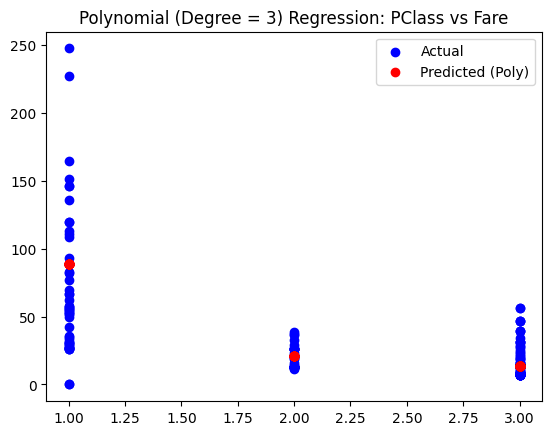

In [41]:
plt.scatter(X4_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial (Degree = 3) Regression: PClass vs Fare")
plt.show()

#### 5.4 Reflections

1. What patterns does the cubic model seem to capture:
- **The cubic model seems to capture a mean of each class**
2. Where does it perform well or poorly:
- **It performs well when the data is less scattered and when there are less extreme values**
3. Did the polynomial fit outperform linear regression:
- **Yes, especially for capturing the average fare of each class. The linear model would have produced a single line that couldn't represent the jumps between classes well**
4. Where (on the graph or among which kinds of data points) does it fit best: 
- **It fits best around the center of each class grouping, but struggles more with outliers.**

## 5.5 Compare All Models

In [42]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y4_test, y_pred_test4)
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y4_test, y_pred_elastic)
report("Polynomial", y4_test, y_pred_poly)

Linear R²: 0.302
Linear RMSE: 1010.43
Linear MAE: 20.65

Ridge R²: 0.302
Ridge RMSE: 1009.50
Ridge MAE: 20.64

ElasticNet R²: 0.339
ElasticNet RMSE: 956.30
ElasticNet MAE: 19.93

Polynomial R²: 0.336
Polynomial RMSE: 960.52
Polynomial MAE: 19.25



### 5.5 Visualize Higher Order Polynomial

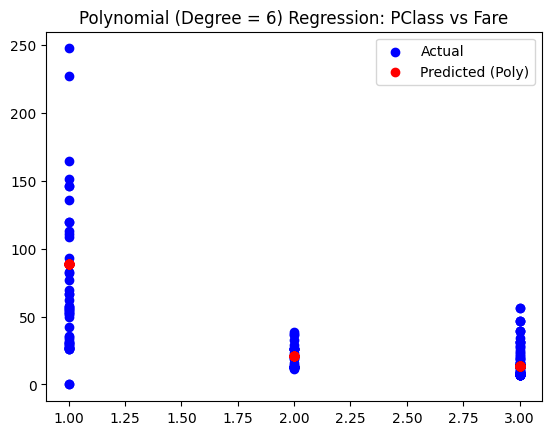

In [43]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=6)
X_train_poly = poly.fit_transform(X4_train)
X_test_poly = poly.transform(X4_test)

poly = PolynomialFeatures(degree=6)
X_train_poly = poly.fit_transform(X4_train)
X_test_poly = poly.transform(X4_test)


plt.scatter(X4_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial (Degree = 6) Regression: PClass vs Fare")
plt.show()

#### Reflection

- The results between the degree 3 and degree 6 polynomial models were very similar. Both captured the average fare for each class fairly well. The degree 6 model did not show significant improvement and added complexity, which could increase the risk of overfitting in other situations.

## Section 6: Final Thoughts and Insights

### 6.1 Summarize Findings

1. What features were the most useful?
- **pclass**
2. What regression model performed best?
- **Elastic and Polynomial -- both had the highest R&sup2; and lowest RMSE/MAE, showing better predictive accuracy. **
How did model complexity or regularization affect results?
- **More complex models like Polynomial captured group averages best.**

### 6.2 Discuss Challenges

1. Was fare hard to predict? Why?
- **Yes, fare varied a lot, even between classes. Most likely influenced by multiple factors that aren't included in the dataset.**
2. Did skew or outliers impact the models?
- **Yes -- models like Polynomial and ElasticNet handled this better by focusing more on the patterns in the majority of the data.**